# Contextualização
O conjunto de dados a ser analisado foi coletado no IBGE e diz respeito a **Pessoas indígenas, por situação do domicílio, localização do domicílio e condição de indígena, segundo o sexo e os grupos de idade - Brasil - 2010**. O Conjunto de dados e composto por três tabelas uma referente ao domicílio urbano outra ao domicílio rutal e uma geral que contempla a soma dos valores das duas tabelas anteriores. 


## Introdução a Análise Explorátoria de Dados
Antes de resolver um problema, é preciso conhecer os dados. A Análise Exploratória de Dados reúne um conjunto de ferramentas úteis para resumir e visualizar as características de uma base de dados. Deve ser parte fundamental de qualquer projeto. Essas técnicas possibilitam criar uma primeira intuição sobre os dados, o que permite conhecer as suas informações, padrões e lançar hipóteses.


* **Objetivos da Análise Explorátoria de Dados**:

O objetivo principal da AED é maximizar a percepção do analista sobre um conjunto de dados e sobre a estrutura subjacente de um conjunto de dados. Fornecendo todos os itens específicos que um analista deseja extrair de um conjunto de dados, como:

* Obter uma visão geral da distribuição do conjunto de dados.
* Verificar se há valores numéricos ausentes, outliers ou outras anomalias no conjunto de dados.
* Descobrir padrões e relacionamentos entre variáveis no conjunto de dados.

# Importando as Bibliotecas

In [1]:
# Importando bibliotecas
library(readxl)
library(tidyverse)
library(gridExtra)
library(moments)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



# Funções

In [115]:
# funcao para gerar tabela de frequencia 
freq_table <- function(col_df)
{
    valores <- c()
    
    total_col <- sum(col_df)
    
    for (value in col_df)
    {
       
        valor <- (value/total_col)
        valores <- append(valores, round(valor,digits = 4))
    }
  
    return(valores)
}


# funcao para gerar tabela de frequencia
freq_table_total <- function(var, tipo)
{
    ## GERAL
    if ((var == "indigena") && (tipo == "geral"))
        {
        
        # gera tabela com a proporcao
        tabela_indigena <- data.frame(freq_table(geral_rural$indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(geral_rural$idades, geral_rural$indigenas,
                                     tabela_indigena$freq_table.geral_rural.indigenas.,
                                     tabela_indigena$freq_table.geral_rural.indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Declararam-se Indigenas (fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
        
    }
    ## HOMEM
    else if ((var == "indigena") && (tipo == "homem")){
        
        # gera tabela com a proporcao
        tabela_indigena <- data.frame(freq_table(homens_rural$indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(homens_rural$idades, homens_rural$indigenas,
                                     tabela_indigena$freq_table.homens_rural.indigenas.,
                                     tabela_indigena$freq_table.homens_rural.indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Declararam-se Indigenas (fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
    }
    
    ## MULHER
    else if ((var == "indigena") && (tipo == "mulher")){
        
        # gera tabela com a proporcao
        tabela_indigena <- data.frame(freq_table(mulheres_rural$indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(mulheres_rural$idades, mulheres_rural$indigenas,
                                     tabela_indigena$freq_table.mulheres_rural.indigenas.,
                                     tabela_indigena$freq_table.mulheres_rural.indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Declararam-se Indigenas (fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
    }
    ## NI Geral
    else if ((var == "nao_indigena")  && (tipo == "geral")){
        
        # gera tabela com a proporcao
        tabela_nao_indigena <- data.frame(freq_table(geral_rural$não_indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(geral_rural$idades, geral_rural$não_indigenas,
                                     tabela_nao_indigena$freq_table.geral_rural.não_indigenas.,
                                     tabela_nao_indigena$freq_table.geral_rural.não_indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Não se declararam(fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
        
    }
    ## HOMEM NI
    else if ((var == "nao_indigena") && (tipo == "homem")){
        
        # gera tabela com a proporcao
        tabela_nao_indigena <- data.frame(freq_table(homens_rural$não_indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(homens_rural$idades, homens_rural$não_indigenas,
                                     tabela_nao_indigena$freq_table.homens_rural.não_indigenas.,
                                     tabela_nao_indigena$freq_table.homens_rural.não_indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Não se declararam(fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
    }
    
    ## MULHER NI
    else if ((var == "nao_indigena") && (tipo == "mulher")){
        
        # gera tabela com a proporcao
        tabela_nao_indigena <- data.frame(freq_table(mulheres_rural$não_indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(mulheres_rural$idades, mulheres_rural$não_indigenas,
                                     tabela_nao_indigena$freq_table.mulheres_rural.não_indigenas.,
                                     tabela_nao_indigena$freq_table.mulheres_rural.não_indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Não se declararam(fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
    }
    
    ## FORA GERAL
    else if ((var == "fora") && (tipo == "geral")){
        
        # gera tabela com a proporcao
        tabela_fora_territorio <- data.frame(freq_table(geral_rural$fora_de_terras_indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(geral_rural$idades, geral_rural$fora_de_terras_indigenas,
                                     tabela_fora_territorio$freq_table.geral_rural.fora_de_terras_indigenas.,
                                     tabela_fora_territorio$freq_table.geral_rural.fora_de_terras_indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Fora de Terras Indígenas (fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
        
    }
    
    ## FORA HOMEM
    else if ((var == "fora") && (tipo == "homem")){
        
        # gera tabela com a proporcao
        tabela_fora_territorio <- data.frame(freq_table(homens_rural$fora_de_terras_indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(homens_rural$idades, homens_rural$fora_de_terras_indigenas,
                                     tabela_fora_territorio$freq_table.homens_rural.fora_de_terras_indigenas.,
                                     tabela_fora_territorio$freq_table.homens_rural.fora_de_terras_indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Fora de Terras Indígenas (fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
        
    }
    
    ## FORA MULHER
    else if ((var == "fora") && (tipo == "mulher")){
        
        # gera tabela com a proporcao
        tabela_fora_territorio <- data.frame(freq_table(mulheres_rural$fora_de_terras_indigenas))
        
        # Criando a tabela de frequencia 
        freq_table_total <- cbind.data.frame(mulheres_rural$idades, mulheres_rural$fora_de_terras_indigenas,
                                     tabela_fora_territorio$freq_table.mulheres_rural.fora_de_terras_indigenas.,
                                     tabela_fora_territorio$freq_table.mulheres_rural.fora_de_terras_indigenas.*100 )
    
        colnames(freq_table_total) <- c("Classe", "Fora de Terras Indígenas (fi)",
                                    "Frequência (fri)", "Porcentagem (100xfri)")
    
        # setando coluna class como indice 
        #rownames(freq_table_total) <- freq_table_total$Classe 
    
        # selecionando colunas 
        #freq_table_total <- freq_table_total[, c(2,3,4)]
    
        # calcula total das colunas
        #freq_table_total["Total", ] <- colSums(freq_table_total)
    
        # resetando o index
        #freq_table_total <- cbind(Classe = rownames(freq_table_total), freq_table_total)
        #rownames(freq_table_total) <- 1:nrow(freq_table_total)
        
    }
    
    
    return(freq_table_total)
    
    
}

resumo_estatistico <- function(x){
    media <- round(mean(x))
    desvio_padrao <- round(sd(x))
    q1 <- quantile(x, probs = 0.25)
    q3 <- quantile(x, probs = 0.75)
    lim_inferior <- q1 - (1.5*(q3-q1))
    lim_superior <- q3 + (1.5*(q3-q1))
    assimetria <- skewness(x)
    curtose <- kurtosis(x)
    
    
    resumo_estatistico <- data.frame(media, desvio_padrao, q1, q3, lim_inferior, lim_superior, assimetria, curtose)
    
    return(resumo_estatistico)
}


# Importando o Conjunto de Dados

In [3]:
# importando conjunto de dados
df_editado <- read_xls(path = "/home/danilo/Estatistica-UFG/Primeiro-Periodo/Estatistica.I/geral_rural_editado.xls")

Vamos dividir o conjunto de dados em três para facilitar nossas análises. Um vai conter os valores totais referentes ao sexo masculino e feminino e os outros dois irao representar os valores para o sexo masculino e o outro para o sexo feminino.

In [4]:
# Separando os conjunto de dados

# Total
geral_rural <- df_editado[-c(17:48), c(1,4,5,6)]

# Homens
homens_rural <- df_editado[c(17:32), c(1,4,5,6)]

# Mulheres
mulheres_rural <- df_editado[c(33:48), c(1,4,5,6)]

# Analisando Conjunto de dados Total Rural

## Tamanho do conjunto de dados
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso dataset é composto por 16 entradas e 4 colunas.

In [5]:
# Dimensao do conjunto de dados
dim(geral_rural)

[1] 16  4

## Visualização do conjunto de dados¶
Visualizar as 5 entradas desse conjunto de dados nos permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [6]:
# visualizando o conjunto de dados
head(geral_rural)


idades,indigenas,não_indigenas,fora_de_terras_indigenas
Menos de 1 ano,14289,1518,1867
1 a 4 anos,57138,6756,8134
5 a 9 anos,67039,8370,10090
10 a 14 anos,57940,8454,9789
15 a 19 anos,45961,6675,8423
20 a 24 anos,37625,6264,7119


**Dicionario das variáveis**:
* **idades** : Intervalo que compreende as idades
* **indigenas** : Compreende as pessoas que se declararam indígenas e moram em terras indígenas
* **não_indigena** : Compreende as pessoas que não se declaram indigenas, mas se consideram indigenas em terras indígenas
* **fora_de_terras_indigenas** : Pessoas consideradas indigenas, mas que moram fora de terras indígenas

## Tipo das Variaveis
Vamos realizar o levantamento dos tipos de variáveis que compõem o conjunto de dados a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [7]:
# listando os tipos dos dados para cada atributo
sapply(geral_rural, class)

idades                indigenas            não_indigenas 
             "character"                "numeric"                "numeric" 
fora_de_terras_indigenas 
               "numeric"

Nosso conjunto de dados apresenta majotariamente variaveis numericas `['declararam-se_indígenas','nao_se_declararam', 'fora_de_terras_indígenas']` sendo todas elas to tipo discreto e uma variavel categorica ordinal `['idades']`.

## Tabelas de Frequência 

In [8]:
geral_rural_ind_freq_table <- freq_table_total(var = "indigena", tipo = "geral")
geral_rural_nind_freq_table <- freq_table_total(var = "nao_indigena", tipo ="geral")
geral_rural_fora_freq_table <- freq_table_total(var = "fora", tipo ="geral")

## Estatística Descritiva ( Media, Mediana , Moda, Desvio Padrao, Assimetria, Curtose)
Como o nome sugere, ajudam a descrever e compreender os conjuntos de dados, apresentando-os de uma maneira mais siginificativa o que permite uma interpretação mais simples dos dados. Os tipos mais comuns de estatistica descritiva incluem as medidas de tendencias centrais e de dispensão.

* Medidas de Tendência Central
Representam o ponto central ou valor típico de um conjunto de dados. Estas medidas indicam onde cai a maioria dos valores de uma distribuição e são também referidas como a localização central de uma distribuição. As três medidas mais comuns de tendencia central são: `média`, a `mediana` e a `moda`. cada uma delas calcula a localização do ponto central utilizando um método diferente.


* Medidas de dispersão
Representam a quantidade de dispersão num conjunto de dados. Enquanto uma medida de tendência central descreve o valor típico, as medidas de variabilidade definem a distância a que os pontos de dados tendem a cair do centro. Uma baixa dispersão indica que os pontos de dados tendem a ser agrupados fortemente em torno do centro. Uma dispersão elevada significa que eles tendem a cair mais longe. As medidas mais comuns de variabilidade são: `amplitude total`, `amplitute interquartil`, `variância`, `desvio-padrão`, `assimetria` e `curtose`.

### Analise Univariada 

#### Variável `Indigena`

In [106]:
geral_rural_ind_freq_table

Classe,Declararam-se Indigenas (fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,14289,"0,0339","3,39"
1 a 4 anos,57138,"0,1354","13,54"
5 a 9 anos,67039,"0,1588","15,88"
10 a 14 anos,57940,"0,1373","13,73"
15 a 19 anos,45961,"0,1089","10,89"
20 a 24 anos,37625,"0,0891","8,91"
25 a 29 anos,31127,"0,0737","7,37"
30 a 34 anos,24879,"0,0589","5,89"
35 a 39 anos,19752,"0,0468","4,68"
40 a 44 anos,15073,"0,0357","3,57"


In [116]:
resumo_estatistico(geral_rural_ind_freq_table$`Declararam-se Indigenas (fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,26382,20636,"10583,5",39709,"-33104,75","83397,25","0,7641825","2,152329"


Interpretação:
* Em territorio indígena temos em média `26382` pessoas que se declaram indígenas com um desvio padrão de `20636`. O grupo de idades com a maior quantidade de pessoas é de 5 a 9 anos seguido pelo de 10 a 14 anos. Outra observação que podemos levantar e que explica esse valor alto do desvio padrão é que a medida que o grupo de idades vai aumentando o número de pessoas vai diminuindo. Ou seja, a grande maioria das pessoas que estão em terriorio indígenas são bastante jovens.
* Não temos valores discrepantes umas vez que nosso conjunto de dados não excede os limites inferior (`-33104.75`) e superior (`83397.25`)
* O conjunto de dados apresentou uma assimetria positiva (`0.76`) e uma curtose de (`2.15`) que indica uma curva platicúrtica  

#### Variável `nao indigena`

In [109]:
geral_rural_nind_freq_table

Classe,Não se declararam(fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,1518,"0,0219","2,19"
1 a 4 anos,6756,"0,0975","9,75"
5 a 9 anos,8370,"0,1208","12,08"
10 a 14 anos,8454,"0,1220","12,20"
15 a 19 anos,6675,"0,0963","9,63"
20 a 24 anos,6264,"0,0904","9,04"
25 a 29 anos,6082,"0,0877","8,77"
30 a 34 anos,5343,"0,0771","7,71"
35 a 39 anos,4282,"0,0618","6,18"
40 a 44 anos,3890,"0,0561","5,61"


In [117]:
resumo_estatistico(geral_rural_nind_freq_table$`Não se declararam(fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,4332,2548,"1857,25","6366,75",-4907,13131,"0,2279784","1,661542"


Interpretação:
* Em territorio indigenas a média de pessoas que não se declaram indígenas foi de `4332` com devio padrão de `2548`. Aqui temos pouca variação se comparamos as pessoas que se declaram indígenas. Entretanto, o padrão se repete, ou seja, a medida que as o grupo de idade aumenta o número de pessoas vai diminuindo.
* Não temos valores discrepantes umas vez que nosso conjunto de dados não excede os limites inferior (`-4907`) e superior (`13131`)
* O conjunto de dados apresentou uma assimetria positiva (`0.22`) e uma curtose de (`1.66`) que indica uma curva platicúrtica  

#### Variável `fora de terras indigenas`

In [110]:
geral_rural_fora_freq_table

Classe,Fora de Terras Indígenas (fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,1867,"0,0231","2,31"
1 a 4 anos,8134,"0,1008","10,08"
5 a 9 anos,10090,"0,1251","12,51"
10 a 14 anos,9789,"0,1214","12,14"
15 a 19 anos,8423,"0,1044","10,44"
20 a 24 anos,7119,"0,0883","8,83"
25 a 29 anos,6059,"0,0751","7,51"
30 a 34 anos,5282,"0,0655","6,55"
35 a 39 anos,4380,"0,0543","5,43"
40 a 44 anos,3955,"0,0490","4,90"


In [118]:
resumo_estatistico(geral_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,5041,2874,"2786,75","7372,75","-4092,25","14251,75","0,5175788","1,86243"


Interpretação:
* Fora de terras indígenas temos uma média de `5041` pessoas que se declaram indígenas e um desvio padrão `2874`. Os jovens continuam sendo a grande maioria
* Não temos valores discrepantes umas vez que nosso conjunto de dados não excede os limites inferior (`-4092.25`) e superior (`14251,75`)
* O conjunto de dados apresentou uma assimetria positiva (`0.51`) e uma curtose de (`1.86`) que indica uma curva platicúrtica  

## Visualização dos Dados

### Gráfico de Barras

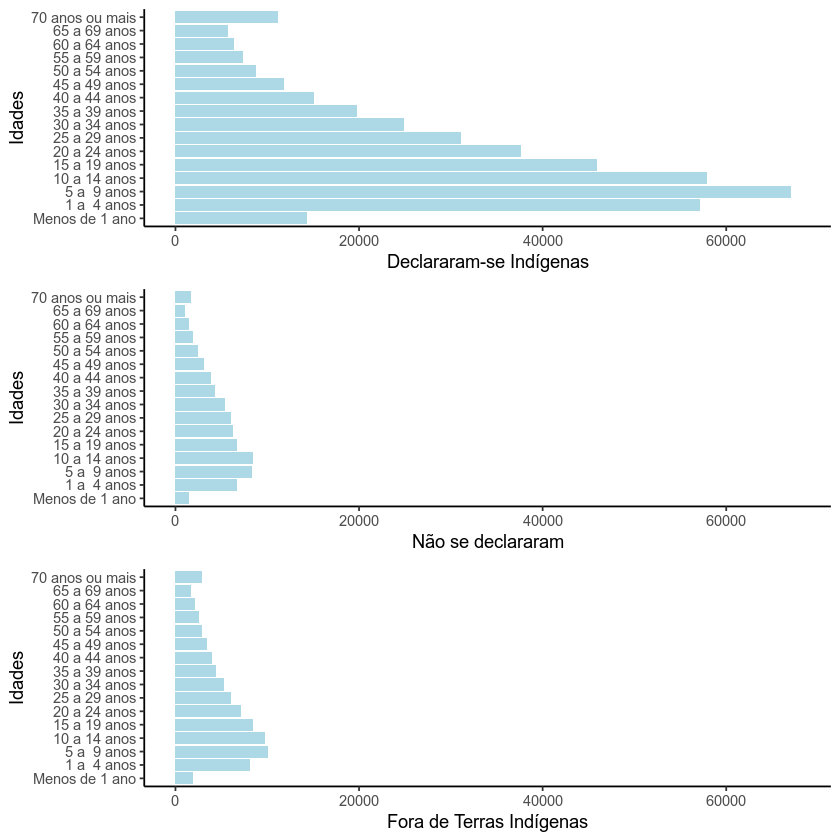

In [53]:
plot1 <- geral_rural_ind_freq_table %>%
            ggplot(aes(fct_reorder(Classe,
                           sort(`Declararam-se Indigenas (fi)`)),
              `Declararam-se Indigenas (fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 68000) +
    labs(x = "Idades", y="Declararam-se Indígenas") +
    theme_classic()


plot2 <- geral_rural_nind_freq_table %>%
    ggplot(aes(fct_reorder(Classe,
                           sort(`Não se declararam(fi)`)),
              `Não se declararam(fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 68000) +
    labs(x = "Idades", y="Não se declararam") +
    theme_classic()

plot3 <- geral_rural_fora_freq_table %>%
    ggplot(aes(fct_reorder(Classe,
                           sort(`Fora de Terras Indígenas (fi)`)),
              `Fora de Terras Indígenas (fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 68000) +
    labs(x = "Idades", y="Fora de Terras Indígenas") +
    theme_classic()

grid.arrange(plot1, plot2, plot3, nrow = 3)

### Gráfico de Caixa - Box plot

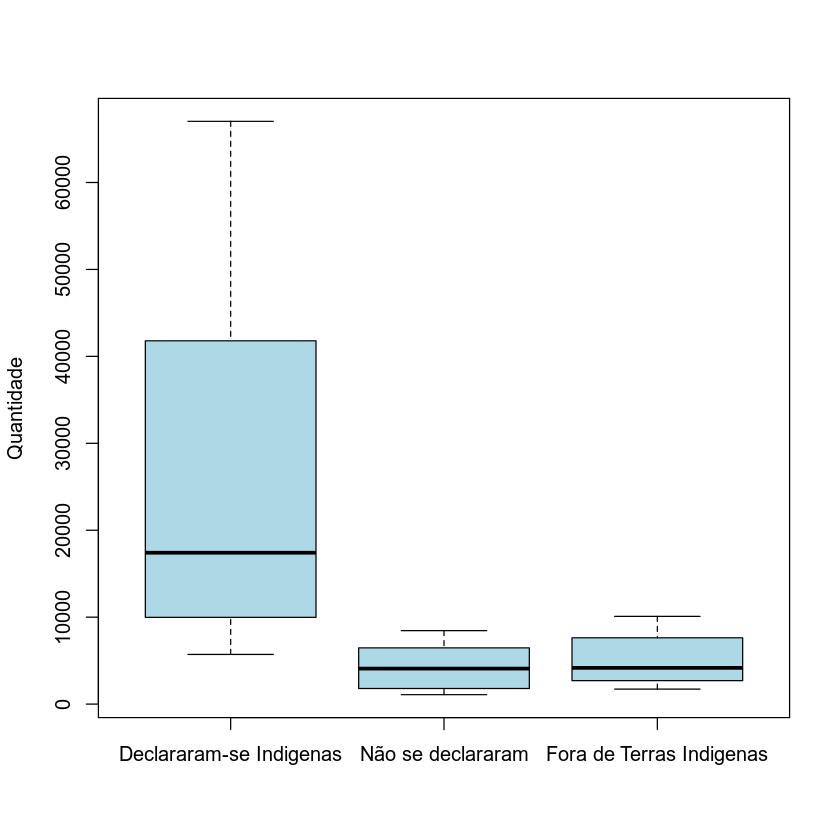

In [14]:
boxplot(cbind(geral_rural_ind_freq_table$`Declararam-se Indigenas (fi)`,
              geral_rural_nind_freq_table$`Não se declararam(fi)`,
              geral_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`), horiz=TRUE, col="lightblue",
        names = c("Declararam-se Indigenas", "Não se declararam", "Fora de Terras Indigenas"), ylab="Quantidade")


### Curva de Densidade

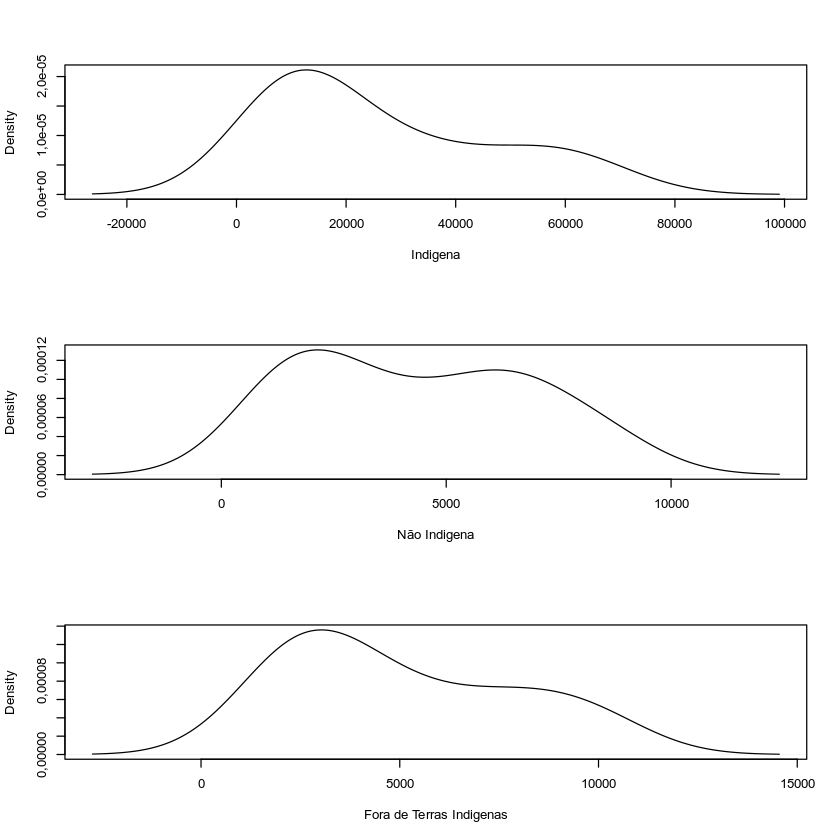

In [15]:
par(mfrow = c(3,1)) 
plot(density(geral_rural_ind_freq_table$`Declararam-se Indigenas (fi)`),main='',xlab='Indigena')
plot(density(geral_rural_nind_freq_table$`Não se declararam(fi)`), main="", xlab="Não Indigena")
plot(density(geral_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`), main="", xlab="Fora de Terras Indigenas")

# Analisando Conjunto de dados Homem Rural

In [16]:
# gerando as tabelas de frequencia
homem_rural_ind_freq_table <- freq_table_total(var = "indigena", tipo = "homem")
homem_rural_nind_freq_table <- freq_table_total(var = "nao_indigena", tipo ="homem")
homem_rural_fora_freq_table <- freq_table_total(var = "fora", tipo ="homem")

#### Variável `Indígena`

In [17]:
homem_rural_ind_freq_table

Classe,Declararam-se Indigenas (fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,7225,"0,0333","3,33"
1 a 4 anos,28888,"0,1333","13,33"
5 a 9 anos,34007,"0,1569","15,69"
10 a 14 anos,29493,"0,1361","13,61"
15 a 19 anos,23490,"0,1084","10,84"
20 a 24 anos,19474,"0,0899","8,99"
25 a 29 anos,16023,"0,0739","7,39"
30 a 34 anos,12929,"0,0597","5,97"
35 a 39 anos,10534,"0,0486","4,86"
40 a 44 anos,8038,"0,0371","3,71"


In [128]:
# Estatistica de Resumo `indigenas`
resumo_estatistico(homem_rural_ind_freq_table$`Declararam-se Indigenas (fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,13546,10443,"5481,5",20478,"-17013,25","42972,75","0,7368257","2,123756"


Interpretação:
* A média de homens que se declaram indígena em terras indígenas é de `13546` com um desvio padrão de `10443`. O grupo de idades com mais homens e o intervalo que vai dos 5 a 9 anos.

#### Variável `Não Indígena`

In [19]:
homem_rural_nind_freq_table

Classe,Não se declararam(fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,787,"0,0210","2,10"
1 a 4 anos,3403,"0,0908","9,08"
5 a 9 anos,4316,"0,1152","11,52"
10 a 14 anos,4482,"0,1196","11,96"
15 a 19 anos,3485,"0,0930","9,30"
20 a 24 anos,3338,"0,0891","8,91"
25 a 29 anos,3196,"0,0853","8,53"
30 a 34 anos,3026,"0,0807","8,07"
35 a 39 anos,2455,"0,0655","6,55"
40 a 44 anos,2286,"0,0610","6,10"


In [120]:
# Estatistica de Resumo `nao indigenas`
resumo_estatistico(homem_rural_nind_freq_table$`Não se declararam(fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,2342,1301,"1054,25","3354,25","-2395,75","6804,25","0,1375437","1,667638"


#### Variável `Fora de Terras Indígenas`

In [21]:
homem_rural_fora_freq_table

Classe,Fora de Terras Indígenas (fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,937,"0,0223","2,23"
1 a 4 anos,4152,"0,0986","9,86"
5 a 9 anos,5189,"0,1233","12,33"
10 a 14 anos,4963,"0,1179","11,79"
15 a 19 anos,4359,"0,1036","10,36"
20 a 24 anos,3766,"0,0895","8,95"
25 a 29 anos,3159,"0,0751","7,51"
30 a 34 anos,2723,"0,0647","6,47"
35 a 39 anos,2338,"0,0555","5,55"
40 a 44 anos,2140,"0,0508","5,08"


In [121]:
# Estatistica de Resumo `fora terras indigenas`
resumo_estatistico(homem_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,2631,1454,1492,"3862,5","-2063,75","7418,25","0,4834265","1,83503"


## Gráfico de Barras

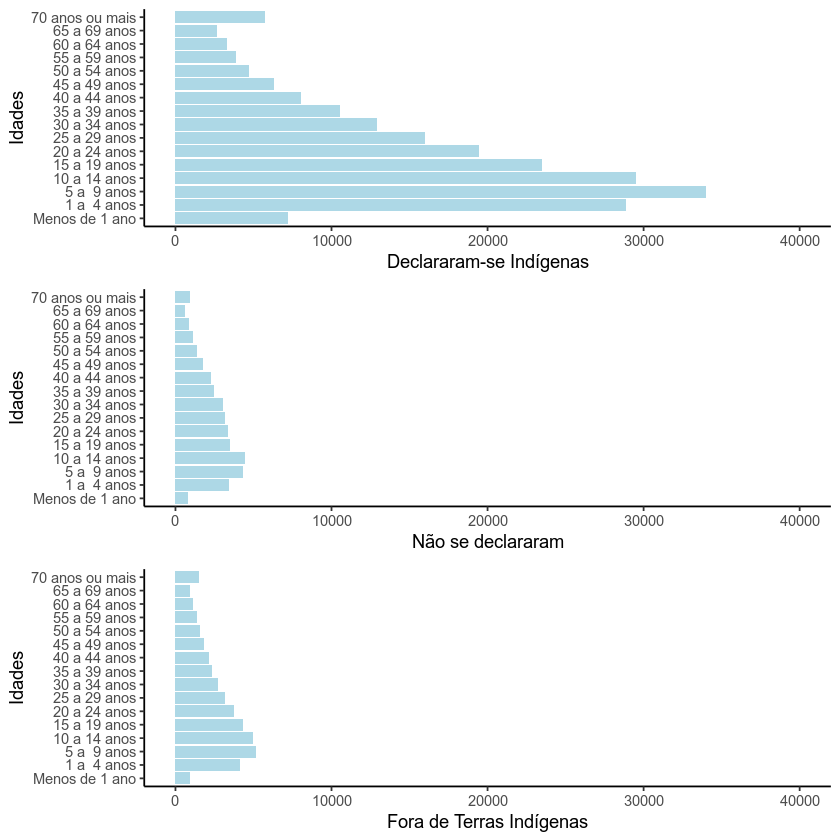

In [57]:
plot1 <- homem_rural_ind_freq_table %>%
            ggplot(aes(fct_reorder(Classe,
                           sort(`Declararam-se Indigenas (fi)`)),
              `Declararam-se Indigenas (fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 40000) +
    labs(x = "Idades", y="Declararam-se Indígenas") +
    theme_classic()


plot2 <- homem_rural_nind_freq_table %>%
    ggplot(aes(fct_reorder(Classe,
                           sort(`Não se declararam(fi)`)),
              `Não se declararam(fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 40000) +
    labs(x = "Idades", y="Não se declararam") +
    theme_classic()

plot3 <- homem_rural_fora_freq_table %>%
    ggplot(aes(fct_reorder(Classe,
                           sort(`Fora de Terras Indígenas (fi)`)),
              `Fora de Terras Indígenas (fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 40000) +
    labs(x = "Idades", y="Fora de Terras Indígenas") +
    theme_classic()

grid.arrange(plot1, plot2, plot3, nrow = 3)

## Gráfico de Caixa - Box plot


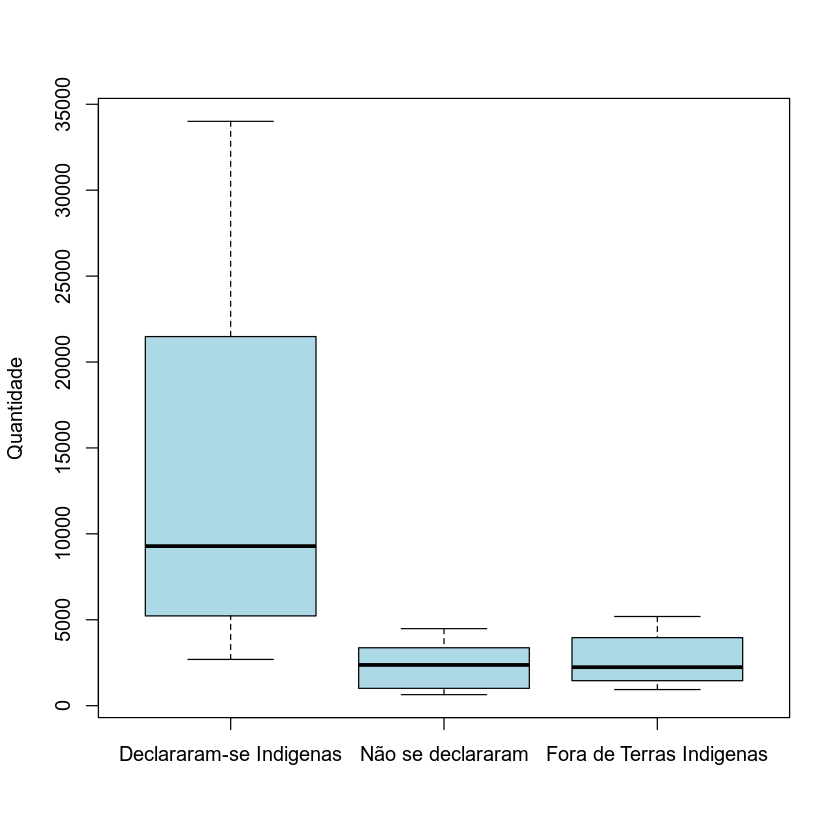

In [24]:
boxplot(cbind(homem_rural_ind_freq_table$`Declararam-se Indigenas (fi)`,
              homem_rural_nind_freq_table$`Não se declararam(fi)`,
              homem_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`), horiz=TRUE, col="lightblue",
        names = c("Declararam-se Indigenas", "Não se declararam", "Fora de Terras Indigenas"), ylab="Quantidade")


## Curva de Densidade

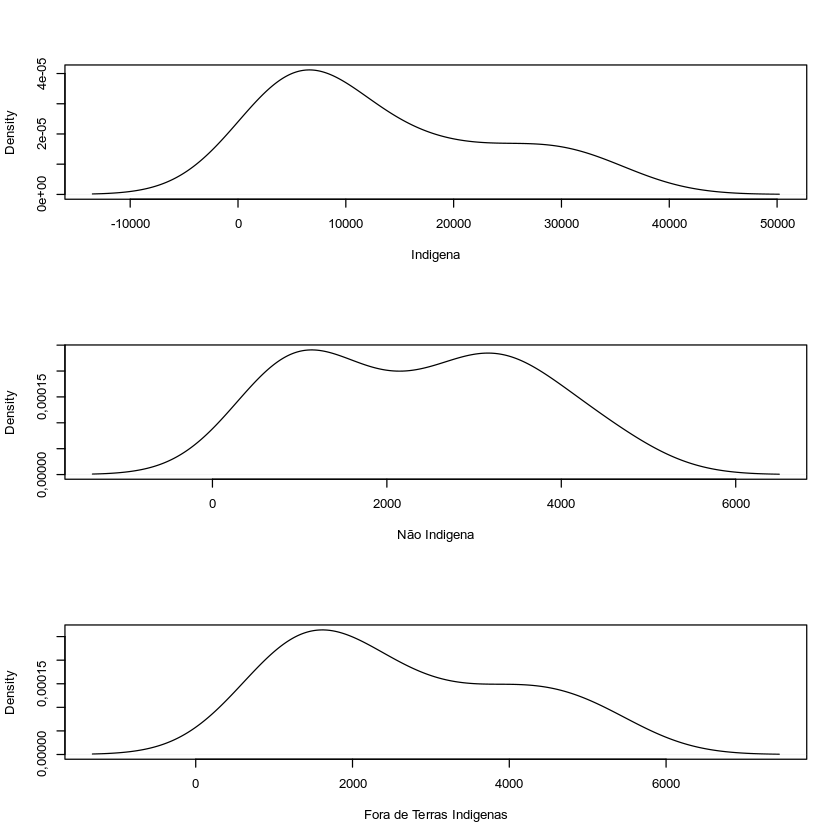

In [25]:
par(mfrow = c(3,1)) 
plot(density(homem_rural_ind_freq_table$`Declararam-se Indigenas (fi)`),main='',xlab='Indigena')
plot(density(homem_rural_nind_freq_table$`Não se declararam(fi)`), main="", xlab="Não Indigena")
plot(density(homem_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`), main="", xlab="Fora de Terras Indigenas")

# Analisando Conjunto de dados Mulheres Rural

In [26]:
# gerando as tabelas de frequencia
mulher_rural_ind_freq_table <- freq_table_total(var = "indigena", tipo = "mulher")
mulher_rural_nind_freq_table <- freq_table_total(var = "nao_indigena", tipo ="mulher")
mulher_rural_fora_freq_table <- freq_table_total(var = "fora", tipo ="mulher")

#### Variável `Indígena`

In [27]:
mulher_rural_ind_freq_table

Classe,Declararam-se Indigenas (fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,7064,"0,0344","3,44"
1 a 4 anos,28250,"0,1376","13,76"
5 a 9 anos,33032,"0,1608","16,08"
10 a 14 anos,28447,"0,1385","13,85"
15 a 19 anos,22471,"0,1094","10,94"
20 a 24 anos,18151,"0,0884","8,84"
25 a 29 anos,15104,"0,0735","7,35"
30 a 34 anos,11950,"0,0582","5,82"
35 a 39 anos,9218,"0,0449","4,49"
40 a 44 anos,7035,"0,0343","3,43"


In [122]:
# Estatistica de Resumo `indigenas`
resumo_estatistico(mulher_rural_ind_freq_table$`Declararam-se Indigenas (fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,12836,10197,5102,19231,"-16091,5","40424,5","0,7906952","2,181849"


#### Variável `Não Indígena`

In [29]:
mulher_rural_nind_freq_table

Classe,Não se declararam(fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,731,"0,0230","2,30"
1 a 4 anos,3353,"0,1053","10,53"
5 a 9 anos,4054,"0,1273","12,73"
10 a 14 anos,3972,"0,1248","12,48"
15 a 19 anos,3190,"0,1002","10,02"
20 a 24 anos,2926,"0,0919","9,19"
25 a 29 anos,2886,"0,0906","9,06"
30 a 34 anos,2317,"0,0728","7,28"
35 a 39 anos,1827,"0,0574","5,74"
40 a 44 anos,1604,"0,0504","5,04"


In [123]:
# Estatistica de Resumo `nao indigenas`
resumo_estatistico(mulher_rural_nind_freq_table$`Não se declararam(fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,1990,1255,803,2992,"-2480,5","6275,5","0,3237089","1,660128"


#### Variável `Fora de Terras Indígenas`

In [127]:
mulher_rural_fora_freq_table

Classe,Fora de Terras Indígenas (fi),Frequência (fri),Porcentagem (100xfri)
Menos de 1 ano,930,"0,0241","2,41"
1 a 4 anos,3982,"0,1032","10,32"
5 a 9 anos,4901,"0,1271","12,71"
10 a 14 anos,4826,"0,1251","12,51"
15 a 19 anos,4064,"0,1054","10,54"
20 a 24 anos,3353,"0,0869","8,69"
25 a 29 anos,2900,"0,0752","7,52"
30 a 34 anos,2559,"0,0663","6,63"
35 a 39 anos,2042,"0,0529","5,29"
40 a 44 anos,1815,"0,0471","4,71"


In [125]:
# Estatistica de Resumo `indigenas`
resumo_estatistico(mulher_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`)

,media,desvio_padrao,q1,q3,lim_inferior,lim_superior,assimetria,curtose
25%,2411,1422,1273,"3510,25","-2082,875","6866,125","0,5515281","1,895904"


## Gráfico de Barras

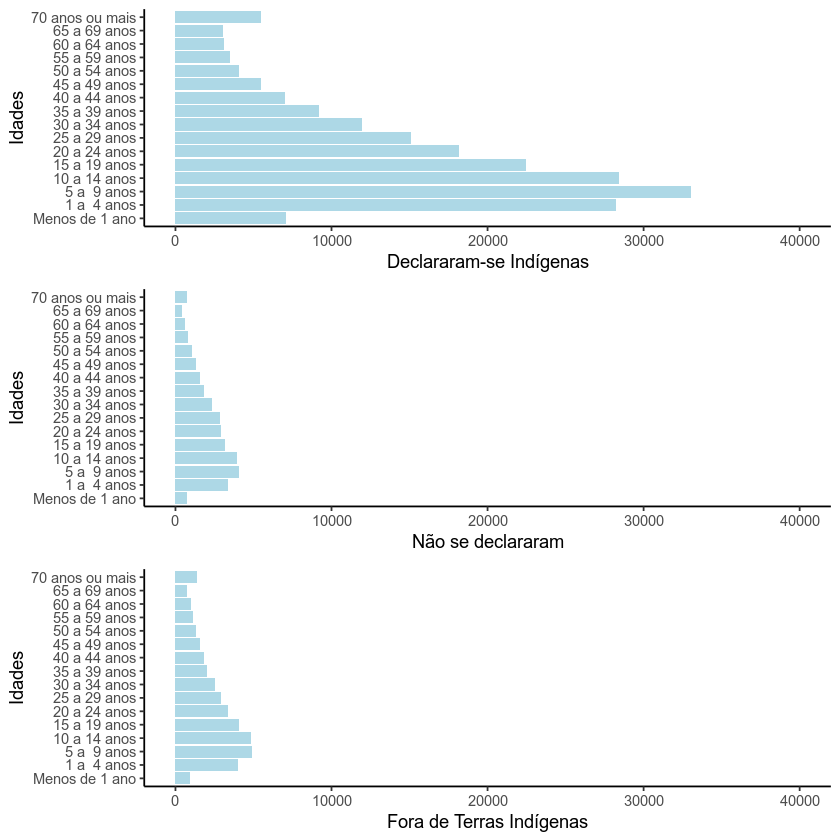

In [59]:
plot1 <- mulher_rural_ind_freq_table %>%
            ggplot(aes(fct_reorder(Classe,
                           sort(`Declararam-se Indigenas (fi)`)),
              `Declararam-se Indigenas (fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 40000) +
    labs(x = "Idades", y="Declararam-se Indígenas") +
    theme_classic()


plot2 <- mulher_rural_nind_freq_table %>%
    ggplot(aes(fct_reorder(Classe,
                           sort(`Não se declararam(fi)`)),
              `Não se declararam(fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 40000) +
    labs(x = "Idades", y="Não se declararam") +
    theme_classic()

plot3 <- mulher_rural_fora_freq_table %>%
    ggplot(aes(fct_reorder(Classe,
                           sort(`Fora de Terras Indígenas (fi)`)),
              `Fora de Terras Indígenas (fi)`))+
    coord_flip()+
    geom_col(fill="lightblue")+
    ylim(0, 40000) +
    labs(x = "Idades", y="Fora de Terras Indígenas") +
    theme_classic()

grid.arrange(plot1, plot2, plot3, nrow = 3)

## Gráfico de Caixa - Box plot

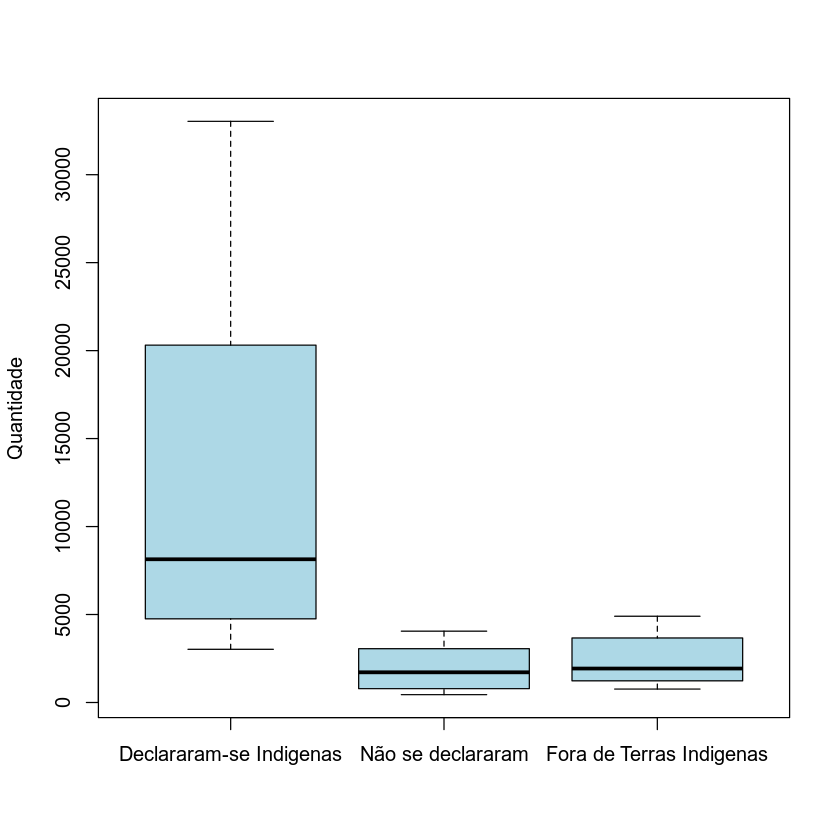

In [34]:
boxplot(cbind(mulher_rural_ind_freq_table$`Declararam-se Indigenas (fi)`,
              mulher_rural_nind_freq_table$`Não se declararam(fi)`,
              mulher_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`), horiz=TRUE, col="lightblue",
        names = c("Declararam-se Indigenas", "Não se declararam", "Fora de Terras Indigenas"), ylab="Quantidade")


## Curva de Densidade

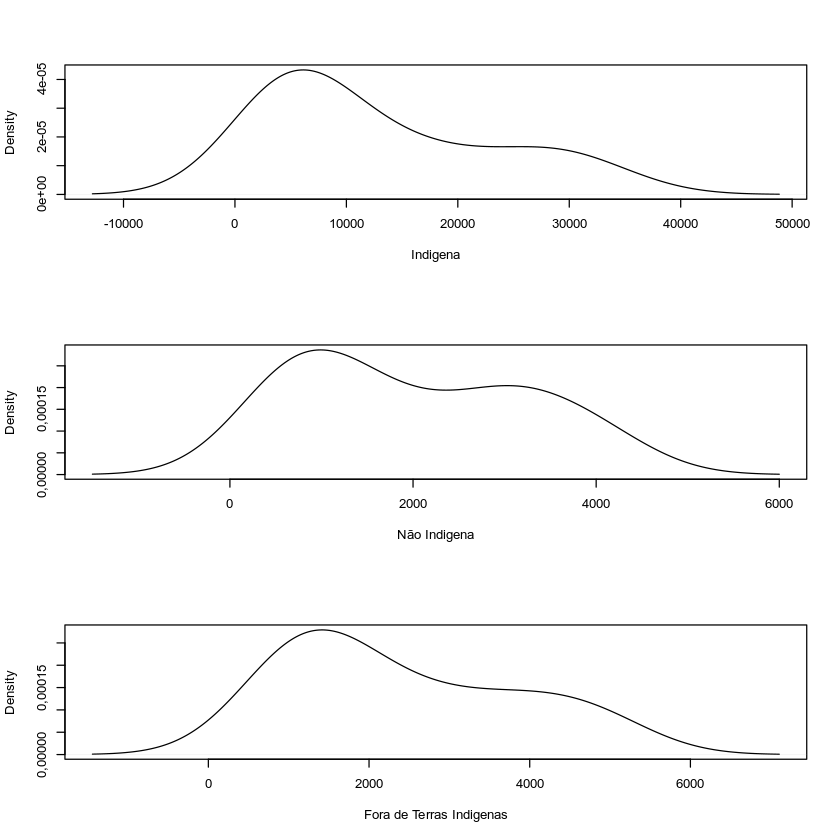

In [64]:
par(mfrow = c(3,1)) 
plot(density(mulher_rural_ind_freq_table$`Declararam-se Indigenas (fi)`),main='',xlab='Indigena')
plot(density(mulher_rural_nind_freq_table$`Não se declararam(fi)`), main="", xlab="Não Indigena")
plot(density(mulher_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`), main="", xlab="Fora de Terras Indigenas")

# Distribuição do Sexo em Terras Indígenas

In [36]:
total_homens <- sum(homem_rural_ind_freq_table$`Declararam-se Indigenas (fi)`,
                    homem_rural_nind_freq_table$`Não se declararam(fi)`)

total_mulheres <- sum(mulher_rural_ind_freq_table$`Declararam-se Indigenas (fi)`,
                    mulher_rural_nind_freq_table$`Não se declararam(fi)`)


distrib_sexo <- data.frame(
    sexo = c("Homem", "Mulher"),
    contagem = c(total_homens, total_mulheres)
    )


# calculo de porcentagens
distrib_sexo$porcentagem <- distrib_sexo$contagem/ sum(distrib_sexo$contagem)

# computando as pocentagens
distrib_sexo$ymax = cumsum(distrib_sexo$porcentagem)

# Compute the bottom of each rectangle
distrib_sexo$ymin = c(0, head(distrib_sexo$ymax, n=-1))

# Compute label position
distrib_sexo$labelPosition <- (distrib_sexo$ymax + distrib_sexo$ymin) / 2

# Compute a good label
distrib_sexo$label <- paste0(distrib_sexo$sexo, ":\n", round(distrib_sexo$porcentagem, 2)*100, "%")

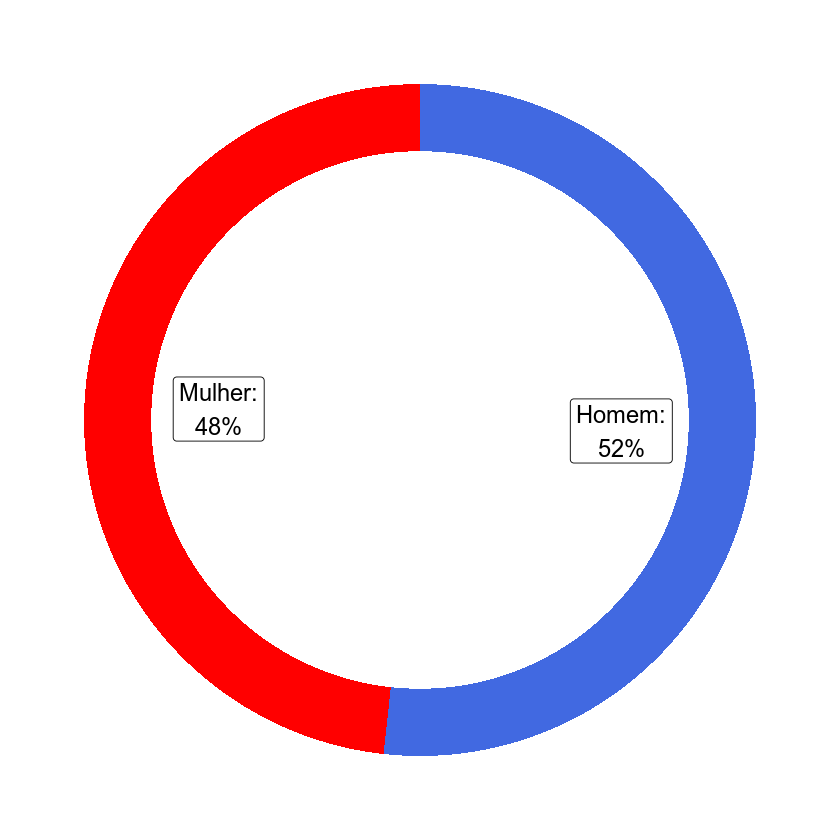

In [37]:
# grafico 
# Make the plot
ggplot(distrib_sexo, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
    geom_rect(fill=c("royalblue","red")) +
    geom_label( x=2, aes(y=labelPosition, label=label), size=5) + # x here controls label position (inner / outer)
    scale_fill_manual(values=c("#999999", "#E69F00")) +
    #scale_fill_brewer(palette=3) +
    #scale_color_brewer(palette=3) +
    coord_polar(theta="y") +
    xlim(c(-1, 4)) +
    theme_void() +
    theme(legend.position = "none")


# Distribuição do Sexo Fora de Terras Indígenas

In [38]:
total_homens_fora <- sum(homem_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`)

total_mulheres_fora <- sum(mulher_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`)


distrib_sexo_fora <- data.frame(
    sexo = c("Homem", "Mulher"),
    contagem = c(total_homens_fora, total_mulheres_fora)
    )


# calculo de porcentagens
distrib_sexo_fora$porcentagem <- distrib_sexo_fora$contagem/ sum(distrib_sexo_fora$contagem)

# computando as pocentagens
distrib_sexo_fora$ymax = cumsum(distrib_sexo_fora$porcentagem)

# Compute the bottom of each rectangle
distrib_sexo_fora$ymin = c(0, head(distrib_sexo_fora$ymax, n=-1))

# Compute label position
distrib_sexo_fora$labelPosition <- (distrib_sexo_fora$ymax + distrib_sexo_fora$ymin) / 2

# Compute a good label
distrib_sexo_fora$label <- paste0(distrib_sexo_fora$sexo, ":\n", round(distrib_sexo_fora$porcentagem, 2)*100, "%")

In [39]:
distrib_sexo_fora

sexo,contagem,porcentagem,ymax,ymin,labelPosition,label
Homem,42090,"0,5218006","0,5218006","0,0000000","0,2609003",Homem: 52%
Mulher,38573,"0,4781994","1,0000000","0,5218006","0,7609003",Mulher: 48%


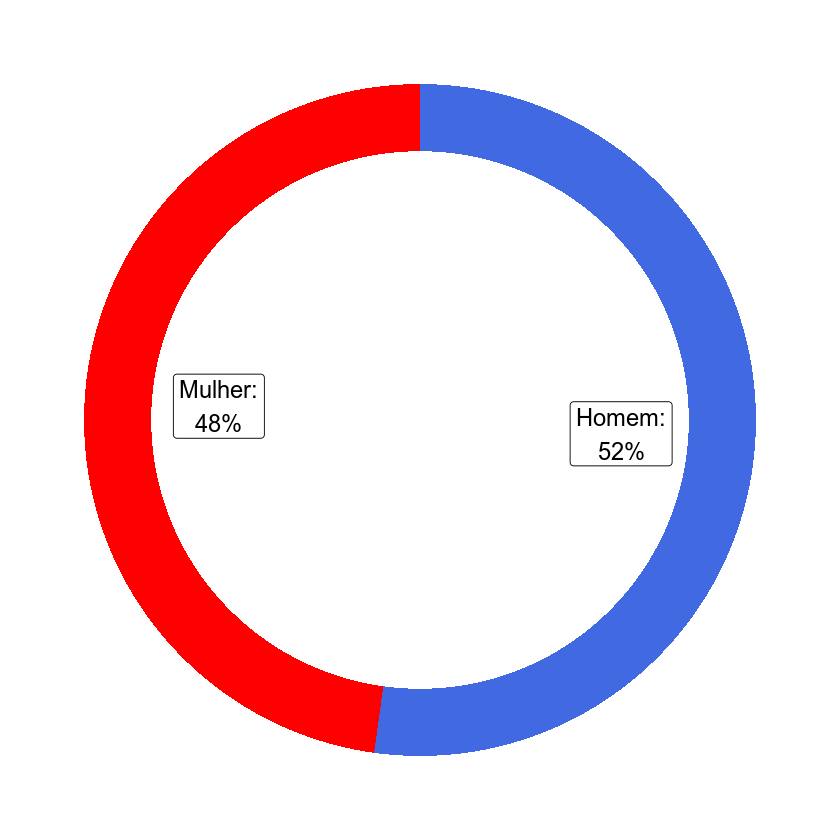

In [40]:
# grafico 
# Make the plot
ggplot(distrib_sexo_fora, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
    geom_rect(fill=c("royalblue","red")) +
    geom_label( x=2, aes(y=labelPosition, label=label), size=5) + # x here controls label position (inner / outer)
    scale_fill_brewer(palette=3) +
    scale_color_brewer(palette=3) +
    coord_polar(theta="y") +
    xlim(c(-1, 4)) +
    theme_void() +
    theme(legend.position = "none")


A proporção se manteve


# Relação de pessoas em terras indigenas e fora de terras indigenas 

In [41]:
total_terra_indigenas <- sum(homem_rural_ind_freq_table$`Declararam-se Indigenas (fi)`,
                    homem_rural_nind_freq_table$`Não se declararam(fi)`,
                             mulher_rural_ind_freq_table$`Declararam-se Indigenas (fi)`,
                            mulher_rural_nind_freq_table$`Não se declararam(fi)`)

total_fora_terras <- sum(homem_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`,
                        mulher_rural_fora_freq_table$`Fora de Terras Indígenas (fi)`)


distrib_total <- data.frame(
    area = c("Em terras indígenas", "Fora das terras indígenas"),
    contagem = c(total_terra_indigenas, total_fora_terras)
    )


# calculo de porcentagens
distrib_total$porcentagem <- distrib_total$contagem/ sum(distrib_total$contagem)

# computando as pocentagens
distrib_total$ymax = cumsum(distrib_total$porcentagem)

# Compute the bottom of each rectangle
distrib_total$ymin = c(0, head(distrib_total$ymax, n=-1))

# Compute label position
distrib_total$labelPosition <- (distrib_total$ymax + distrib_total$ymin) / 2

# Compute a good label
distrib_total$label <- paste0(distrib_total$area, ":\n", round(distrib_total$porcentagem, 2)*100, "%")

In [42]:
distrib_total

area,contagem,porcentagem,ymax,ymin,labelPosition,label
Em terras indígenas,491420,"0,8590012","0,8590012","0,0000000","0,4295006",Em terras indígenas: 86%
Fora das terras indígenas,80663,"0,1409988","1,0000000","0,8590012","0,9295006",Fora das terras indígenas: 14%


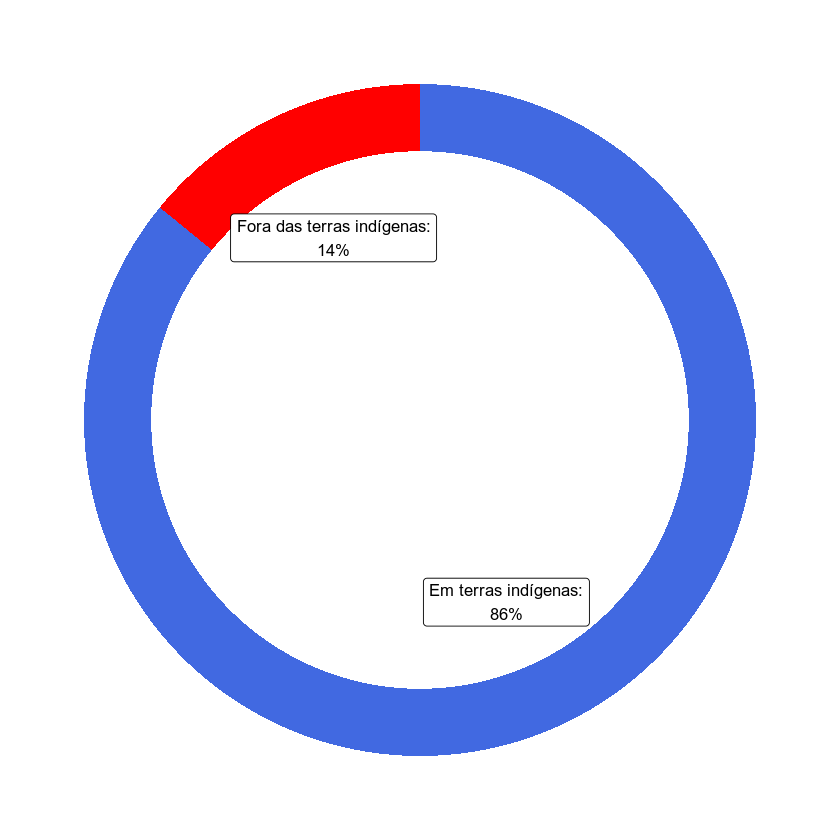

In [43]:
# grafico 

ggplot(distrib_total, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
    geom_rect(fill=c("royalblue","red")) +
    geom_label( x=2, aes(y=labelPosition, label=label), size=3.5) + # x here controls label position (inner / outer)
    scale_fill_brewer(palette=1) +
    scale_color_brewer(palette=5) +
    coord_polar(theta="y") +
    xlim(c(-1, 4)) +
    theme_void() +
    theme(legend.position = "none")

O padrão que foi apresentado quando analisamos os dados gerais e que se extendeu ao sexo masculino e feminino foi a média de pessoas que se declaram indígena estando em terras indígenas em comparação as que não se declaram e que estão fora das terras indígenas. Outro ponto interessante a levantar e que a grande maioria dos individuos são jovens abrangendo a casa dos 5 aos 29 anos, sendo a maior concentração no grupo de 5 a 9 anos. Um outro padrão visível nos dados é a queda no número de pessoas à medida que temos idades mais avançadas.